# ADNI Phenotype Sample SQL

In [ ]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    database="adni",
    user="dbadmin",
    password="hopkinsx93ewD",
    host="ohdsicdmdb.postgres.database.azure.com",
    port="5432",
    connect_timeout = 6000
)
cursor = conn.cursor()

In [ ]:
cursor.close()
conn.close()

In [2]:
# 36713262 procedure
# 2128000367 echo <= 10 
# 2128000366 repetition time between 500 and 800
# 2129001004 number of slices > 100
# 2128000493 flip angle between 8 and 15

sql_query = """
    select io.wadors_uri, io.person_id
    , max(case when measurement_concept_id = 2128000367 and value_as_number <= 10 then 1 else 0 end) as echo
    , max(case when measurement_concept_id = 2128000366 and value_as_number between 500 and 800 then 1 else 0 end) as repetition_time
    , max(case when measurement_concept_id = 2129001004 and value_as_number > 100 then 1 else 0 end) as number_of_slices
    , max(case when measurement_concept_id = 2128000493 and value_as_number between 8 and 15 then 1 else 0 end) as flip_angle
    from dbo.procedure_occurrence p
    left join dbo.image_occurrence io on p.procedure_occurrence_id = io.procedure_occurrence_id
    left join dbo.image_feature if on io.image_occurrence_id = if.image_occurrence_id
    left join dbo.measurement m on if.image_feature_event_id = m.measurement_id
    where procedure_concept_id = 36713262
    group by io.wadors_uri, io.person_id
    ;
""" 

pt_procedure = pd.read_sql_query(sql_query, conn)

/var/folders/wh/p78ddrtn39j879rx8h8fs8fr0000gn/T/ipykernel_58524/4127391004.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pt_procedure = pd.read_sql_query(sql_query, conn)


In [5]:
pt_procedure

,wadors_uri,person_id,echo,repetition_time,number_of_slices,flip_angle
0,https://imgextpoc-adnidicom.dicom.azurehealthc...,3645,0,0,1,0
1,https://imgextpoc-adnidicom.dicom.azurehealthc...,3669,1,1,1,0
2,https://imgextpoc-adnidicom.dicom.azurehealthc...,1594,0,1,1,0
3,https://imgextpoc-adnidicom.dicom.azurehealthc...,2372,1,1,1,0
4,https://imgextpoc-adnidicom.dicom.azurehealthc...,3322,1,1,1,0
...,...,...,...,...,...,...
884,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,0,0,1,0
885,https://imgextpoc-adnidicom.dicom.azurehealthc...,3331,1,1,1,0
886,https://imgextpoc-adnidicom.dicom.azurehealthc...,1858,1,1,1,0
887,https://imgextpoc-adnidicom.dicom.azurehealthc...,3336,0,0,0,0


In [8]:
pt_procedure[(pt_procedure['echo'] == 1) & (pt_procedure['repetition_time'] == 1) & (pt_procedure['number_of_slices'] == 1) & (pt_procedure['flip_angle'] == 1)]

,wadors_uri,person_id,echo,repetition_time,number_of_slices,flip_angle


In [25]:
sql_query = """
    select io.wadors_uri, io.person_id, m.measurement_concept_id, c.concept_name, m.value_as_number, m.measurement_source_value, if.anatomic_site_concept_id, c2.concept_name as anatomic_name
    from dbo.procedure_occurrence p
    left join dbo.image_occurrence io on p.procedure_occurrence_id = io.procedure_occurrence_id
    left join dbo.image_feature if on io.image_occurrence_id = if.image_occurrence_id
    left join dbo.measurement m on if.image_feature_event_id = m.measurement_id
    left join dbo.concept c on m.measurement_concept_id = c.concept_id
    left join dbo.concept c2 on if.anatomic_site_concept_id = c2.concept_id
    where procedure_concept_id = 36713262
    ;
""" 

pt_procedure = pd.read_sql_query(sql_query, conn)

/var/folders/wh/p78ddrtn39j879rx8h8fs8fr0000gn/T/ipykernel_22577/3996612134.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pt_procedure = pd.read_sql_query(sql_query, conn)


In [26]:
pt_procedure.shape #(4451332, 25)

# 2128000367 echo <= 10 
# 2128000366 repetition time between 500 and 800
# 2129001004 number of slices > 100
# 2128000493 flip angle between 8 and 15

(4509572, 8)

In [27]:
pt_procedure.tail()

,wadors_uri,person_id,measurement_concept_id,concept_name,value_as_number,measurement_source_value,anatomic_site_concept_id,anatomic_name
4509567,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,2129001004,Number of slices - count,688.0,688,4119359,Entire brain
4509568,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,2129001004,Number of slices - count,688.0,688,4119359,Entire brain
4509569,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,2129001004,Number of slices - count,688.0,688,4119359,Entire brain
4509570,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,2129001004,Number of slices - count,688.0,688,4119359,Entire brain
4509571,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,2129001004,Number of slices - count,688.0,688,4119359,Entire brain


<Axes: >

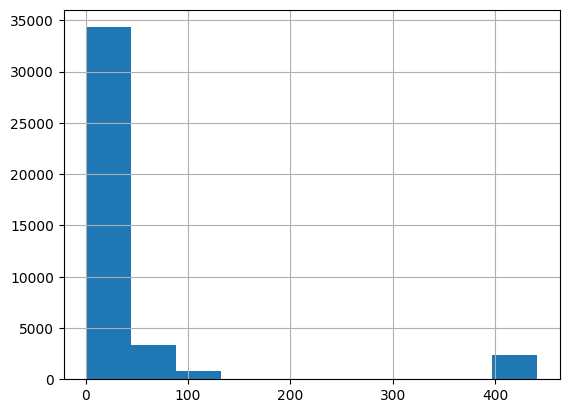

In [28]:
# echo
pt_procedure[pt_procedure['measurement_concept_id']==2128000367].value_as_number.hist()

<Axes: >

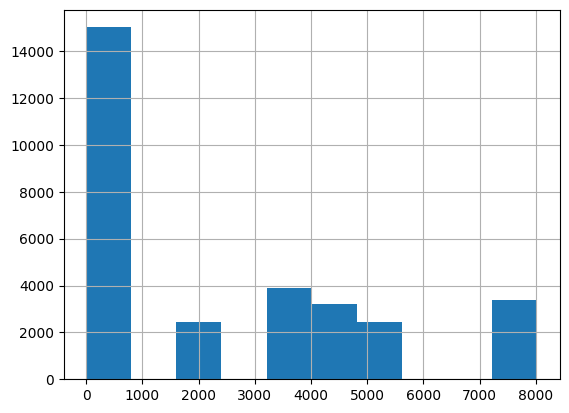

In [5]:
# repetition time
pt_procedure[pt_procedure['measurement_concept_id']==2128000366].value_as_number.hist()

<Axes: >

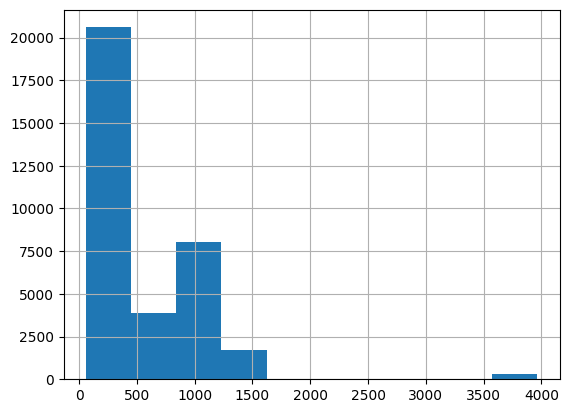

In [6]:
# number of slices
pt_procedure[pt_procedure['measurement_concept_id']==2129001004].value_as_number.hist()

<Axes: >

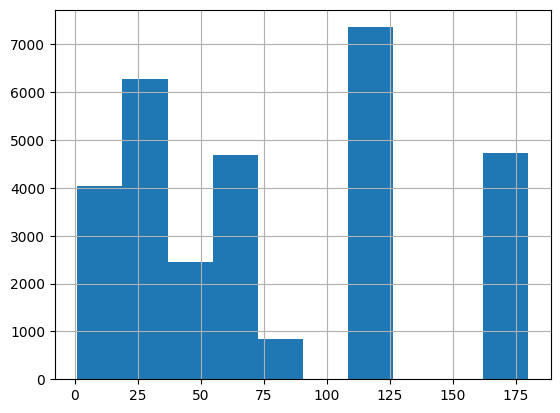

In [7]:
# flip angle 
pt_procedure[pt_procedure['measurement_concept_id']==2128000493].value_as_number.hist()

<Axes: >

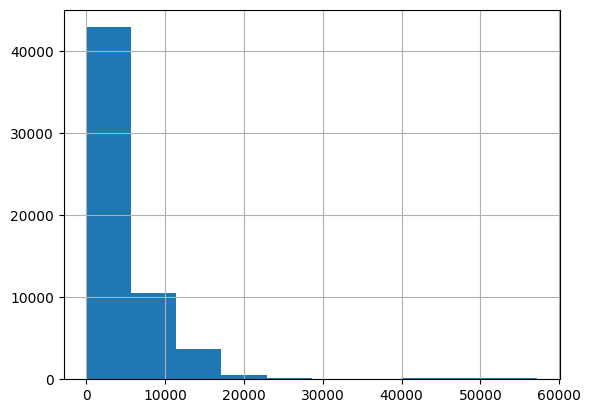

In [8]:
# brain volume
pt_procedure[pt_procedure['measurement_concept_id']==3011794].value_as_number.hist()

/var/folders/wh/p78ddrtn39j879rx8h8fs8fr0000gn/T/ipykernel_22577/3416613140.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  omop_npi = pd.read_sql_query(sql_query, conn)


<Axes: >

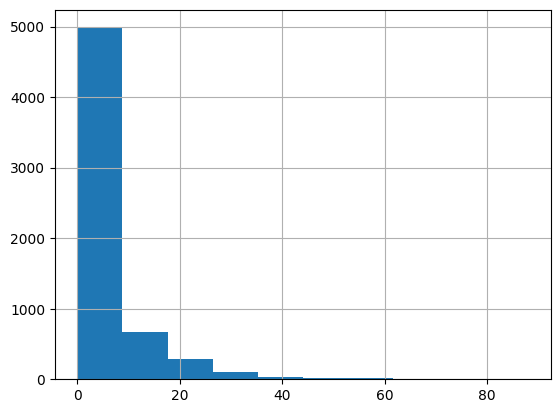

In [10]:
sql_query = """
    select c.concept_name, m.*
    from dbo.measurement m
    left join dbo.concept c on m.measurement_concept_id = c.concept_id
    where measurement_concept_id = 2041571213
    ;
""" 

omop_npi = pd.read_sql_query(sql_query, conn)

# NPI total score 2041571213
omop_npi[omop_npi['measurement_concept_id']==2041571213].value_as_number.hist()

In [30]:
pt_procedure[pt_procedure['concept_name']== "Inversion Time"]

,wadors_uri,person_id,measurement_concept_id,concept_name,value_as_number,measurement_source_value,anatomic_site_concept_id,anatomic_name
30172,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,2128000368,Inversion Time,1650.0,1650,4119359,Entire brain
30173,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,2128000368,Inversion Time,1650.0,1650,4119359,Entire brain
30174,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,2128000368,Inversion Time,1650.0,1650,4119359,Entire brain
30175,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,2128000368,Inversion Time,1650.0,1650,4119359,Entire brain
30176,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,2128000368,Inversion Time,1650.0,1650,4119359,Entire brain
...,...,...,...,...,...,...,...,...
4505775,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,2128000368,Inversion Time,900.0,900,4119359,Entire brain
4505776,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,2128000368,Inversion Time,900.0,900,4119359,Entire brain
4505777,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,2128000368,Inversion Time,900.0,900,4119359,Entire brain
4505778,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,2128000368,Inversion Time,900.0,900,4119359,Entire brain


In [31]:
df = pt_procedure[pt_procedure['measurement_concept_id'].isin([2128000367, 2128000366, 2129001004, 2128000493,2128000368])][['wadors_uri', 'person_id', 'concept_name', 'value_as_number']]

In [32]:
df = df.loc[:, ~df.columns.duplicated()]

In [33]:
df_aggregated = df.groupby(['wadors_uri', 'person_id', 'concept_name']).agg({'value_as_number': 'mean'}).reset_index()

# Pivot the aggregated DataFrame
df_wide = df_aggregated.pivot(index=['wadors_uri', 'person_id'], columns='concept_name', values='value_as_number').reset_index()

# Rename columns if needed
# df_wide.columns = ['wadors_uri', 'person_id', 'rep_time', 'echo', 'flip_angle', 'num_slices']

In [34]:
df_wide

concept_name,wadors_uri,person_id,Echo Time,Flip Angle,Inversion Time,Number of slices - count,Repetition Time
0,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,2.98,9.0,900.0,1294.0,2300.0
1,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,5.00,40.0,NaN,75.0,20.0
2,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,20.26,180.0,NaN,61.0,4000.0
3,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,6.15,60.0,NaN,678.0,571.0
4,https://imgextpoc-adnidicom.dicom.azurehealthc...,2161,50.00,122.0,NaN,206.0,8020.0
...,...,...,...,...,...,...,...
884,https://imgextpoc-adnidicom.dicom.azurehealthc...,3332,5.00,40.0,NaN,75.0,20.0
885,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,NaN,NaN,NaN,67.0,NaN
886,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,NaN,NaN,NaN,61.0,NaN
887,https://imgextpoc-adnidicom.dicom.azurehealthc...,3290,NaN,NaN,NaN,61.0,NaN


In [45]:
df_wide['person_id'].nunique()

35

In [44]:
# combining all manufacturers  #pt_procedure[pt_procedure['concept_name']=="Manufacturer"] none (LR values are not imported)
# TR between 1500 and 2500 OR < 10
# TE < 10
# TI between 800 and 1000 OR <500

df_wide[((df_wide['Repetition Time'] >= 1500) & (df_wide['Repetition Time'] <= 2500) & (df_wide['Echo Time'] < 10) & (df_wide['Inversion Time'] >= 800) 
        & (df_wide['Inversion Time'] <= 1000)) | ((df_wide['Repetition Time'] < 10) & (df_wide['Echo Time'] < 10) & (df_wide['Inversion Time'] < 500))]['person_id'].nunique()

35

In [56]:
image_list = df_wide[((df_wide['Repetition Time'] >= 1500) & (df_wide['Repetition Time'] <= 2500) & (df_wide['Echo Time'] < 10) & (df_wide['Inversion Time'] >= 800) 
        & (df_wide['Inversion Time'] <= 1000)) | ((df_wide['Repetition Time'] < 10) & (df_wide['Echo Time'] < 10) & (df_wide['Inversion Time'] < 500))]['wadors_uri']

In [51]:
brain_vol = pt_procedure[(pt_procedure['measurement_concept_id']==3011794) 
             & (pt_procedure['anatomic_name'].isin(['Parahippocampal Gyrus Left', 'Parahippocampal Gyrus Right', 'Entorhinal Area Left'
                                                    , 'Entorhinal Area Right', 'Amygdala Left', 'Amygdala Right','Hippocampus Left'
                                                    , 'Hippocampus Right', 'Cingulum (Cingulate Gyrus) Left', 'Cingulum (Cingulate Gyrus) Right']))]

In [54]:
brain_vol_agg = brain_vol.groupby(['wadors_uri', 'person_id', 'anatomic_name']).agg({'value_as_number': 'mean'}).reset_index()
brain_vol_wide = brain_vol_agg.pivot(index=['wadors_uri', 'person_id'], columns='anatomic_name', values='value_as_number').reset_index()
brain_vol_wide.head()

anatomic_name,wadors_uri,person_id,Amygdala Left,Amygdala Right,Cingulum (Cingulate Gyrus) Left,Cingulum (Cingulate Gyrus) Right,Entorhinal Area Left,Entorhinal Area Right,Hippocampus Left,Hippocampus Right,Parahippocampal Gyrus Left,Parahippocampal Gyrus Right
0,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,1115.0,1641.0,2076.0,2562.0,426.0,701.0,3115.0,3727.0,609.0,1018.0
1,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,1095.0,1602.0,2058.0,2580.0,394.0,632.0,3142.0,3720.0,614.0,1018.0
2,https://imgextpoc-adnidicom.dicom.azurehealthc...,2556,1596.0,1923.0,2243.0,2726.0,578.0,693.0,3405.0,3703.0,839.0,1234.0
3,https://imgextpoc-adnidicom.dicom.azurehealthc...,1594,1571.0,1987.0,2223.0,2306.0,633.0,665.0,3354.0,3431.0,701.0,806.0
4,https://imgextpoc-adnidicom.dicom.azurehealthc...,1594,1680.0,1943.0,2165.0,2317.0,683.0,703.0,3492.0,3435.0,752.0,767.0


In [55]:
brain_vol_wide.shape #(26, 12)

(26, 12)

In [57]:
brain_vol_wide[brain_vol_wide['wadors_uri'].isin(image_list)]

anatomic_name,wadors_uri,person_id,Amygdala Left,Amygdala Right,Cingulum (Cingulate Gyrus) Left,Cingulum (Cingulate Gyrus) Right,Entorhinal Area Left,Entorhinal Area Right,Hippocampus Left,Hippocampus Right,Parahippocampal Gyrus Left,Parahippocampal Gyrus Right
0,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,1115.0,1641.0,2076.0,2562.0,426.0,701.0,3115.0,3727.0,609.0,1018.0
1,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,1095.0,1602.0,2058.0,2580.0,394.0,632.0,3142.0,3720.0,614.0,1018.0
2,https://imgextpoc-adnidicom.dicom.azurehealthc...,2556,1596.0,1923.0,2243.0,2726.0,578.0,693.0,3405.0,3703.0,839.0,1234.0
3,https://imgextpoc-adnidicom.dicom.azurehealthc...,1594,1571.0,1987.0,2223.0,2306.0,633.0,665.0,3354.0,3431.0,701.0,806.0
4,https://imgextpoc-adnidicom.dicom.azurehealthc...,1594,1680.0,1943.0,2165.0,2317.0,683.0,703.0,3492.0,3435.0,752.0,767.0
5,https://imgextpoc-adnidicom.dicom.azurehealthc...,2556,1503.0,1822.0,2266.0,2768.0,548.0,681.0,3331.0,3562.0,823.0,1212.0
6,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,1065.0,1712.0,2199.0,2646.0,435.0,766.0,3118.0,3750.0,628.0,1027.0
7,https://imgextpoc-adnidicom.dicom.azurehealthc...,2593,1049.0,1180.0,2272.0,2487.0,462.0,466.0,2584.0,2778.0,635.0,911.0
8,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,1039.0,1507.0,2118.0,2662.0,392.0,666.0,3078.0,3686.0,624.0,1048.0
9,https://imgextpoc-adnidicom.dicom.azurehealthc...,134,1700.0,1967.0,2531.0,2769.0,764.0,835.0,3347.0,3644.0,891.0,1108.0


## end

In [46]:
# only philips and seimens
df_wide[((df_wide['Repetition Time'] >= 1500) & (df_wide['Repetition Time'] <= 2500) & (df_wide['Echo Time'] < 10) & (df_wide['Inversion Time'] >= 800) 
        & (df_wide['Inversion Time'] <= 1000)) ]['person_id'].nunique()

27

In [41]:
# 2128000367 echo <= 10 
# 2128000366 repetition time between 500 and 800
# 2128000493 flip angle between 8 and 15
# 2129001004 number of slices > 100
df_wide[(df_wide['Echo Time'] < 10) & (df_wide['Number of slices - count'] > 100) & (df_wide['Repetition Time']<=800) 
        & (df_wide['Repetition Time']>=500) & (df_wide['Number of slices - count']>100)]['person_id'].nunique()

26

In [39]:
# we can increase TR to 800, so let's try TR: <800, TE: <30 and num slices >100
df_wide[(df_wide['Echo Time'] < 30) & (df_wide['Number of slices - count'] > 100) & (df_wide['Repetition Time']<800) & (df_wide['Number of slices - count']>100)]['person_id'].nunique()

35

In [27]:
cohort = df_wide[(df_wide['echo'] < 30) & (df_wide['num_slices'] > 100) & (df_wide['rep_time']<800) & (df_wide['num_slices']>100)]

In [28]:
cohort.to_csv('cohort_version_1.csv', index=False)

In [3]:
import pandas as pd
cohort = pd.read_csv('cohort_version_1.csv')

<Axes: >

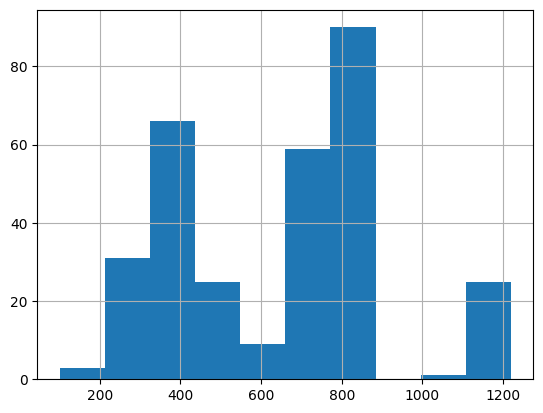

In [4]:
cohort['num_slices'].hist() 

In [5]:
sql_query = """
    select distinct io.wadors_uri, io.person_id, m.*
    from dbo.procedure_occurrence p
    left join dbo.image_occurrence io on p.procedure_occurrence_id = io.procedure_occurrence_id
    left join dbo.image_feature if on io.image_occurrence_id = if.image_occurrence_id
    left join dbo.measurement m on if.image_feature_event_id = m.measurement_id
    where procedure_concept_id = 36713262
    and if.anatomic_site_concept_id = 2129000000
    and m.value_as_number > 12542
    ;
""" 
test = pd.read_sql_query(sql_query, conn)

/var/folders/wh/p78ddrtn39j879rx8h8fs8fr0000gn/T/ipykernel_88122/392654852.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test = pd.read_sql_query(sql_query, conn)


In [6]:
test

,wadors_uri,person_id,measurement_id,person_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_time,measurement_type_concept_id,operator_concept_id,...,provider_id,visit_occurrence_id,visit_detail_id,measurement_source_value,measurement_source_concept_id,unit_source_value,unit_source_concept_id,value_source_value,measurement_event_id,meas_event_field_concept_id
0,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,649087,1572,3011794,2024-06-13,None,None,32880,None,...,None,None,None,15687.0,3011794,None,None,None,None,None
1,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,649097,1572,3011794,2024-06-13,None,None,32880,None,...,None,None,None,15995.0,3011794,None,None,None,None,None
2,https://imgextpoc-adnidicom.dicom.azurehealthc...,2556,649095,2556,3011794,2024-06-13,None,None,32880,None,...,None,None,None,16240.0,3011794,None,None,None,None,None
3,https://imgextpoc-adnidicom.dicom.azurehealthc...,1594,649083,1594,3011794,2024-06-13,None,None,32880,None,...,None,None,None,12832.0,3011794,None,None,None,None,None
4,https://imgextpoc-adnidicom.dicom.azurehealthc...,2556,649079,2556,3011794,2024-06-13,None,None,32880,None,...,None,None,None,15217.0,3011794,None,None,None,None,None
5,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,649080,1572,3011794,2024-06-13,None,None,32880,None,...,None,None,None,15451.0,3011794,None,None,None,None,None
6,https://imgextpoc-adnidicom.dicom.azurehealthc...,2593,649099,2593,3011794,2024-06-13,None,None,32880,None,...,None,None,None,14617.0,3011794,None,None,None,None,None
7,https://imgextpoc-adnidicom.dicom.azurehealthc...,1572,649093,1572,3011794,2024-06-13,None,None,32880,None,...,None,None,None,14852.0,3011794,None,None,None,None,None
8,https://imgextpoc-adnidicom.dicom.azurehealthc...,134,649085,134,3011794,2024-06-13,None,None,32880,None,...,None,None,None,15235.0,3011794,None,None,None,None,None
9,https://imgextpoc-adnidicom.dicom.azurehealthc...,75,649094,75,3011794,2024-06-13,None,None,32880,None,...,None,None,None,13929.0,3011794,None,None,None,None,None


### Select more images for OpenMap

In [2]:
sql_query = """
	select o.image_study_uid, o.image_series_uid, c.concept_name, c.concept_code, m.value_as_number
	from dbo.image_occurrence o
	join dbo.image_feature f on o.image_occurrence_id = f.image_occurrence_id
	join dbo.measurement m on f.image_feature_event_id = m.measurement_id
	join dbo.concept c on m.measurement_concept_id = c.concept_id
	where c.concept_code in ('00180050', '00180080', '00180081', '00180082', '00180088', '00180091'
		, '00181310', '00280010', '00280011', '00280030', '00181314')
""" 

images = pd.read_sql_query(sql_query, conn)

/var/folders/wh/p78ddrtn39j879rx8h8fs8fr0000gn/T/ipykernel_58620/3429730370.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  images = pd.read_sql_query(sql_query, conn)


In [6]:
sql_query = """
	select o.image_study_uid, o.image_series_uid
	from dbo.image_occurrence o
	join dbo.image_feature f on o.image_occurrence_id = f.image_occurrence_id
	join dbo.measurement m on f.image_feature_event_id = m.measurement_id
	join dbo.concept c on m.measurement_concept_id = c.concept_id
	where c.concept_id = 2129001138
""" 

images_done = pd.read_sql_query(sql_query, conn)

/var/folders/wh/p78ddrtn39j879rx8h8fs8fr0000gn/T/ipykernel_58620/4164408980.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  images_done = pd.read_sql_query(sql_query, conn)


In [3]:
images.head()

,image_study_uid,image_series_uid,concept_name,concept_code,value_as_number
0,2.16.124.113543.6006.99.01801933550335298251,2.16.124.113543.6006.99.0151466144310778475,Slice Thickness,00180050,2.00
1,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06083117774660962009,Slice Thickness,00180050,1.00
2,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06083117774660962009,Repetition Time,00180080,2300.00
3,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06083117774660962009,Repetition Time,00180080,2300.00
4,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06083117774660962009,Echo Time,00180081,2.98


In [11]:
images['concept_name'].unique()

array(['Slice Thickness', 'Repetition Time', 'Echo Time',
       'Inversion Time', 'Echo Train Length', 'Acquisition Matrix',
       'Flip Angle', 'Rows', 'Columns', 'Pixel Spacing',
       'Spacing Between Slices'], dtype=object)

In [4]:
images_group = images.groupby(['image_study_uid', 'image_series_uid', 'concept_name', 'concept_code']).agg({'value_as_number': 'mean'}).reset_index()

# Pivot the aggregated DataFrame
df_wide = images_group.pivot(index=['image_study_uid', 'image_series_uid'], columns='concept_name', values='value_as_number').reset_index()

In [10]:
df_wide

concept_name,image_study_uid,image_series_uid,Acquisition Matrix,Columns,Echo Time,Echo Train Length,Flip Angle,Inversion Time,Pixel Spacing,Repetition Time,Rows,Slice Thickness,Spacing Between Slices
0,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06083117774660962009,0.0,0.0,2.98,1.0,9.0,900.0,1.000000,2300.0,0.0,1.0,NaN
1,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06263494736769400825,0.0,0.0,5.00,1.0,40.0,NaN,1.458333,20.0,0.0,8.0,9.60
2,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06964874624365474765,0.0,0.0,20.26,31.0,180.0,NaN,1.875000,4000.0,0.0,4.5,4.50
3,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.07300304364963768908,0.0,0.0,6.15,0.0,60.0,NaN,2.974359,571.0,0.0,3.0,3.75
4,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.08097639857522452001,0.0,0.0,50.00,15.0,122.0,NaN,0.390625,8020.0,0.0,2.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.16.124.113543.6006.99.79681648954433493,2.16.124.113543.6006.99.8966243323051598559,0.0,0.0,5.00,1.0,40.0,NaN,1.458333,20.0,0.0,8.0,9.60
885,2.16.124.113543.6006.99.8489038623925207314,2.16.124.113543.6006.99.02861399588723067010,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.00
886,2.16.124.113543.6006.99.8489038623925207314,2.16.124.113543.6006.99.04260885138522413045,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
887,2.16.124.113543.6006.99.8489038623925207314,2.16.124.113543.6006.99.05171454917789975719,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [8]:
df_export = df_wide[~df_wide['image_series_uid'].isin(images_done['image_series_uid'])]

In [12]:
df_export

concept_name,image_study_uid,image_series_uid,Acquisition Matrix,Columns,Echo Time,Echo Train Length,Flip Angle,Inversion Time,Pixel Spacing,Repetition Time,Rows,Slice Thickness,Spacing Between Slices
0,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06083117774660962009,0.0,0.0,2.98,1.0,9.0,900.0,1.000000,2300.0,0.0,1.0,NaN
1,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06263494736769400825,0.0,0.0,5.00,1.0,40.0,NaN,1.458333,20.0,0.0,8.0,9.60
2,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.06964874624365474765,0.0,0.0,20.26,31.0,180.0,NaN,1.875000,4000.0,0.0,4.5,4.50
3,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.07300304364963768908,0.0,0.0,6.15,0.0,60.0,NaN,2.974359,571.0,0.0,3.0,3.75
4,2.16.124.113543.6006.99.01060096421826160662,2.16.124.113543.6006.99.08097639857522452001,0.0,0.0,50.00,15.0,122.0,NaN,0.390625,8020.0,0.0,2.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.16.124.113543.6006.99.79681648954433493,2.16.124.113543.6006.99.8966243323051598559,0.0,0.0,5.00,1.0,40.0,NaN,1.458333,20.0,0.0,8.0,9.60
885,2.16.124.113543.6006.99.8489038623925207314,2.16.124.113543.6006.99.02861399588723067010,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.00
886,2.16.124.113543.6006.99.8489038623925207314,2.16.124.113543.6006.99.04260885138522413045,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
887,2.16.124.113543.6006.99.8489038623925207314,2.16.124.113543.6006.99.05171454917789975719,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [13]:
# df_export.to_csv('image_series_in_db.csv')

### For Gabriel's project

In [ ]:
brain_omop = pd.read_csv('./files/adni_brain_vol.csv')
brain_omop.head()

In [ ]:
brain_vol_data = brain_vol.merge(brain_omop, how ='inner', left_on = 'series_id', right_on = 'image_series_uid')

In [ ]:
adni = pd.read_csv('./files/adni_export.csv')
adni.head()

In [ ]:
cohort_npi_data = adni.pivot_table(
                        index = ['patient_category', 'person_id', 'measurement_date'],
                        columns= 'measurement_concept_name',
                        values='value_as_number'
                    ).reset_index()

In [ ]:
cohort_npi_data.columns.name = None
cohort_npi_data.head()

In [ ]:
cohort_npi_data = cohort_npi_data.rename(columns={
    'Neuropsychiatric Inventory Section A. Delusions: Item score': 'NPI Section A. Delusions',
    'Neuropsychiatric Inventory Section B. Hallucinations: Item score': 'NPI Section B. Hallucinations',
    'Neuropsychiatric Inventory Section C. Agitation/Aggression: Item score': 'NPI Section C. Agitation/Aggression',
    'Neuropsychiatric Inventory Section D. Depression/Dysphoria: Item score': 'NPI Section D. Depression/Dysphoria',
    'Neuropsychiatric Inventory Section E. Anxiety: Item score': 'NPI Section E. Anxiety',
    'Neuropsychiatric Inventory Section F. Elation/Euphoria: Item score': 'NPI Section F. Elation/Euphoria',
    'Neuropsychiatric Inventory Section G. Apathy/Indifference: Item score': 'NPI Section G. Apathy/Indifference',
    'Neuropsychiatric Inventory Section H. Disinhibition: Item score': 'NPI Section H. Disinhibition',
    'Neuropsychiatric Inventory Section I. Irritability/Lability: Item score': 'NPI Section I. Irritability/Lability',
    'Neuropsychiatric Inventory Section J. Aberrant Motor Behavior: Item score': 'NPI Section J. Aberrant Motor Behavior',
    'Neuropsychiatric Inventory Section K. Sleep: Item score': 'NPI Section K. Sleep',
    'Neuropsychiatric Inventory Section L. Appetite and eating disorders: Item score': 'NPI Section L. Appetite and eating disorders',
    'Neuropsychiatric Inventory Total Score': 'NPI Total Score'
})
cohort_npi_data.head()

In [ ]:
cohort_npi_data.tail()

In [ ]:
cohort_npi_data.shape #(191, 16)

In [ ]:
cohort_npi_data.person_id.nunique() #34

In [ ]:
brain_vol_data.person_id.nunique()

In [ ]:
brain_vol_data['image_occurrence_date'] = pd.to_datetime(brain_vol_data['image_occurrence_date'])
brain_vol_data['image_occurrence_year'] = brain_vol_data['image_occurrence_date'].dt.year

In [ ]:
cohort_npi_data['measurement_date'] = pd.to_datetime(cohort_npi_data['measurement_date'])
cohort_npi_data['measurement_year'] = cohort_npi_data['measurement_date'].dt.year

In [ ]:
final_data = cohort_npi_data.merge(brain_vol_data, how = 'inner', left_on = ['person_id', 'measurement_year'], right_on = ['person_id', 'image_occurrence_year'])

In [ ]:
final_data.head()

In [ ]:
final_data.shape

In [ ]:
# final_data.to_csv('./files/data_for_GS.csv')